<a href="https://colab.research.google.com/github/gianfelipe93/titanic-spaceship/blob/experimenting-with-eda/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [3]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         55           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        100           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        629           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        132           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1220           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14959            True  
house-pr

In [4]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 101MB/s]


In [5]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd 

train_path = "/content/train.csv"
test_path = "/content/test.csv"
raw_train_dataframe = pd.read_csv(train_path)
raw_test_dataframe = pd.read_csv(test_path)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import StringLookup
from tensorflow.keras.optimizers import SGD

print(tf.__version__)

2.8.2


In [86]:
raw_train_dataframe.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [90]:
raw_train_dataframe.loc[raw_train_dataframe['Age'].notna() == False]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
50,0052_01,Earth,False,G/6/S,TRAPPIST-1e,NaN,False,4.0,0.0,2.0,4683.0,0.0,Elaney Hubbarton,False
64,0068_01,Mars,False,E/4/S,TRAPPIST-1e,NaN,False,793.0,0.0,2.0,253.0,0.0,Cinst Binie,False
137,0149_01,Earth,True,G/27/S,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Billya Hubbarrison,True
181,0202_02,Europa,False,A/2/P,55 Cancri e,NaN,False,0.0,2433.0,NaN,878.0,443.0,Vegas Embleng,True
184,0206_01,Europa,False,C/9/S,55 Cancri e,NaN,False,2.0,1720.0,12.0,1125.0,122.0,Nuson Brugashed,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,8835_01,Earth,True,G/1425/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Shalle Bartines,False
8301,8862_03,Europa,True,C/329/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Alchib Myling,True
8374,8956_04,Earth,False,G/1453/P,TRAPPIST-1e,NaN,False,194.0,1.0,10.0,629.0,0.0,Krisa Bonnondry,False
8407,8988_01,Earth,True,G/1448/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Maen Fowlesterez,True


In [9]:
eda_df = raw_train_dataframe.copy()

In [10]:
eda_df = eda_df.dropna()

In [11]:
eda_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [12]:
eda_df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [13]:
eda_df.groupby('VIP').sum()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
VIP,,,,,,,
False,184736.0,1417843.0,2854230.0,1141286.0,1942285.0,1807787.0,3267
True,6138.0,55240.0,309770.0,36937.0,126460.0,198984.0,60


In [115]:
eda_df.groupby('Destination')['Spa'].mean().round(1)

Destination
55 Cancri e      483.7
PSO J318.5-22    116.8
TRAPPIST-1e      287.5
Name: Spa, dtype: float64

In [ ]:
eda_df.isna().sum()

In [ ]:
eda_df.groupby('Destination')['Age'].mean().round(0)#.plot(y='Age', kind="bar", figsize=(10, 10))

In [116]:
def set_VRDeck(line):
  if pd.notna(line.VRDeck):
    return line

  if line.VRDeck == "55 Cancri e":
    line.VRDeck = 500.8
  elif line.VRDeck == 'PSO J318.5-22':
    line.VRDeck = 138.1
  else:
    line.VRDeck = 265.8

  return line

In [117]:
def set_Spa(line):
  if pd.notna(line.Spa):
    return line

  if line.Destination == "55 Cancri e":
    line.Spa = 483.7
  elif line.Destination == 'PSO J318.5-22':
    line.Spa = 116.8
  else:
    line.Spa = 287.5

  return line

In [118]:
def set_ShoppingMall(line):
  if pd.notna(line.ShoppingMall):
    return line

  if line.Destination == "55 Cancri e":
    line.ShoppingMall = 168.1
  elif line.Destination == 'PSO J318.5-22':
    line.ShoppingMall = 116.7
  else:
    line.ShoppingMall = 189.9

  return line

In [119]:
def set_FoodCourt(line):
  if pd.notna(line.FoodCourt):
    return line

  if line.Destination == "55 Cancri e":
    line.FoodCourt = 908.4
  elif line.Destination == 'PSO J318.5-22':
    line.FoodCourt = 132.0
  else:
    line.FoodCourt = 394.2

  return line

In [120]:
def set_roomService(line):
  if pd.notna(line.RoomService):
    return line

  if line.Destination == "55 Cancri e":
    line.RoomService = 181.7
  elif line.Destination == 'PSO J318.5-22':
    line.RoomService = 99.3
  else:
    line.RoomService = 252.5

  return line

In [73]:
def set_cryoSleep(line):
  if pd.notna(line.CryoSleep):
    return line

  if line.VIP == 1:
    line.CryoSleep = 0
  else:
    line.CryoSleep = 1

  return line

In [72]:
def set_age(line):
  if pd.notna(line.Age):
    return line

  if line.Destination == "55 Cancri e" or line.Destination == "TRAPPIST-1e":
    line.Age = 29.0
  elif line.Destination == 'PSO J318.5-22':
    line.Age = 28

  return line


In [21]:
raw_train_dataframe.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [22]:
raw_test_dataframe.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [23]:
len(raw_train_dataframe)

8693

#EDA

In [135]:
train_eda_dataframe = raw_train_dataframe.copy()

In [136]:
test_eda_dataframe = raw_test_dataframe.copy()

In [137]:
train_eda_dataframe.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [138]:
# train_eda_dataframe = train_eda_dataframe.dropna()
train_eda_dataframe['VIP'].fillna(value=False, inplace=True)
test_eda_dataframe['VIP'].fillna(value=False, inplace=True)

In [139]:
train_eda_dataframe = train_eda_dataframe.apply(lambda x: set_cryoSleep(x), axis=1)
test_eda_dataframe = test_eda_dataframe.apply(lambda x: set_cryoSleep(x), axis=1)

In [140]:
train_eda_dataframe['HomePlanet'].fillna(value="Earth", inplace=True)
test_eda_dataframe['HomePlanet'].fillna(value="Earth", inplace=True)

In [141]:
train_eda_dataframe['Destination'].fillna(value="TRAPPIST-1e", inplace=True)
test_eda_dataframe['Destination'].fillna(value="TRAPPIST-1e", inplace=True)

In [142]:
train_eda_dataframe = train_eda_dataframe.apply(lambda x: set_age(x), axis=1)
test_eda_dataframe = test_eda_dataframe.apply(lambda x: set_age(x), axis=1)

In [143]:
train_eda_dataframe = train_eda_dataframe.apply(lambda x: set_roomService(x), axis=1)
test_eda_dataframe = test_eda_dataframe.apply(lambda x: set_roomService(x), axis=1)

In [144]:
train_eda_dataframe = train_eda_dataframe.apply(lambda x: set_FoodCourt(x), axis=1)
test_eda_dataframe = test_eda_dataframe.apply(lambda x: set_FoodCourt(x), axis=1)

In [145]:
train_eda_dataframe = train_eda_dataframe.apply(lambda x: set_ShoppingMall(x), axis=1)
test_eda_dataframe = test_eda_dataframe.apply(lambda x: set_ShoppingMall(x), axis=1)

In [146]:
train_eda_dataframe = train_eda_dataframe.apply(lambda x: set_Spa(x), axis=1)
test_eda_dataframe = test_eda_dataframe.apply(lambda x: set_Spa(x), axis=1)

In [147]:
train_eda_dataframe = train_eda_dataframe.apply(lambda x: set_VRDeck(x), axis=1)
test_eda_dataframe = test_eda_dataframe.apply(lambda x: set_VRDeck(x), axis=1)

In [ ]:
train_eda_dataframe.head()

In [148]:
train_eda_dataframe.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [149]:
test_eda_dataframe.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

In [ ]:
train_eda_dataframe["CryoSleep"] = train_eda_dataframe["CryoSleep"].astype(int)
train_eda_dataframe["VIP"] = train_eda_dataframe["VIP"].astype(int)
train_eda_dataframe["Age"] = train_eda_dataframe["Age"].astype(int)

test_eda_dataframe["CryoSleep"] = test_eda_dataframe["CryoSleep"].astype(int)
test_eda_dataframe["VIP"] = test_eda_dataframe["VIP"].astype(int)
test_eda_dataframe["Age"] = test_eda_dataframe["Age"].astype(int)

In [151]:
train_eda_dataframe.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,0,E/608/S,TRAPPIST-1e,44,0,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [152]:
test_eda_dataframe.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4272,9266_02,Earth,1,G/1496/S,TRAPPIST-1e,34,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,0,NaN,TRAPPIST-1e,42,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,1,D/296/P,55 Cancri e,29,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,0,D/297/P,TRAPPIST-1e,29,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale
4276,9277_01,Earth,1,G/1498/S,PSO J318.5-22,43,0,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley


In [153]:
train_dataframe = train_eda_dataframe.copy()
test_dataframe = test_eda_dataframe.copy()

In [154]:
columns_to_drop=['Name']

In [155]:
columns_to_drop.append('Cabin')

In [156]:
def put_age_in_bracket(age):
  if 0.0 <= age <= 4.99:
    return "Baby"
  if 5.0 <= age <= 12.99:
    return "Child"
  elif 13.0 <= age <= 19.99:
    return "Teen"
  elif 20.0 <= age <= 39.99:
    return "Young Adult"
  elif 40.0 <= age <= 59.99:
    return "Mature Age"
  else: 
    return "Senior"

def create_age_buckets(age_dataframe):
  age_bucket_df = age_dataframe.apply(lambda row: put_age_in_bracket(row))

  return age_bucket_df

In [157]:
train_dataframe['Age_Bucket'] = create_age_buckets(train_dataframe['Age'])
test_dataframe['Age_Bucket'] = create_age_buckets(test_dataframe['Age'])

columns_to_drop.append('Age')

train_dataframe.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_Bucket
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Mature Age
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Teen
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Young Adult
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Young Adult
8692,9280_02,Europa,0,E/608/S,TRAPPIST-1e,44,0,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True,Mature Age


In [159]:
train_dataframe['RoomService'].describe()

count     8693.000000
mean       224.660428
std        659.781657
min          0.000000
25%          0.000000
50%          0.000000
75%         78.000000
max      14327.000000
Name: RoomService, dtype: float64

In [158]:
def put_cost_in_bracket(cost):
  if cost == 0.0:
    return "Free"
  if 0.01 <= cost <= 1499.99:
    return "Extremely Cheap"
  if 1500.0 <= cost <= 2999.99:
    return "Fairly Cheap"
  if 3000.0 <= cost <= 4499.99:
    return "Cheap"
  if 4500.0 <= cost <= 5999.99:
    return "Fair"
  if 6000.0 <= cost <= 7499.99:
    return "Expensive"
  if 7500.0 <= cost <= 8999.99:
    return "Fairly Expensive"
  if cost >= 9000.00:
    return "Extremely Expensive"

def create_cost_buckets(cost_dataframe):
  cost_bucket_df = cost_dataframe.apply(lambda row: put_cost_in_bracket(row))

  return cost_bucket_df

In [160]:
train_dataframe['RoomService_Bucket'] = create_cost_buckets(train_dataframe['RoomService'])
train_dataframe['FoodCourt_Bucket'] = create_cost_buckets(train_dataframe['FoodCourt'])
train_dataframe['ShoppingMall_Bucket'] = create_cost_buckets(train_dataframe['ShoppingMall'])
train_dataframe['Spa_Bucket'] = create_cost_buckets(train_dataframe['Spa'])
train_dataframe['VRDeck_Bucket'] = create_cost_buckets(train_dataframe['VRDeck'])
train_dataframe.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_Bucket,RoomService_Bucket,FoodCourt_Bucket,ShoppingMall_Bucket,Spa_Bucket,VRDeck_Bucket
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Mature Age,Free,Expensive,Free,Fairly Cheap,Extremely Cheap
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Teen,Free,Free,Free,Free,Free
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Young Adult,Free,Free,Fairly Cheap,Extremely Cheap,Free
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Young Adult,Free,Extremely Cheap,Free,Extremely Cheap,Cheap
8692,9280_02,Europa,0,E/608/S,TRAPPIST-1e,44,0,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True,Mature Age,Extremely Cheap,Fair,Free,Free,Extremely Cheap


In [161]:
test_dataframe['RoomService_Bucket'] = create_cost_buckets(test_dataframe['RoomService'])
test_dataframe['FoodCourt_Bucket'] = create_cost_buckets(test_dataframe['FoodCourt'])
test_dataframe['ShoppingMall_Bucket'] = create_cost_buckets(test_dataframe['ShoppingMall'])
test_dataframe['Spa_Bucket'] = create_cost_buckets(test_dataframe['Spa'])
test_dataframe['VRDeck_Bucket'] = create_cost_buckets(test_dataframe['VRDeck'])
test_dataframe.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Age_Bucket,RoomService_Bucket,FoodCourt_Bucket,ShoppingMall_Bucket,Spa_Bucket,VRDeck_Bucket
4272,9266_02,Earth,1,G/1496/S,TRAPPIST-1e,34,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,Young Adult,Free,Free,Free,Free,Free
4273,9269_01,Earth,0,NaN,TRAPPIST-1e,42,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,Mature Age,Free,Extremely Cheap,Extremely Cheap,Extremely Cheap,Extremely Cheap
4274,9271_01,Mars,1,D/296/P,55 Cancri e,29,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,Young Adult,Free,Free,Free,Free,Free
4275,9273_01,Europa,0,D/297/P,TRAPPIST-1e,29,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,Young Adult,Free,Fairly Cheap,Free,Free,Extremely Cheap
4276,9277_01,Earth,1,G/1498/S,PSO J318.5-22,43,0,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,Mature Age,Free,Free,Free,Free,Free


In [ ]:
columns_to_drop.append('RoomService')
columns_to_drop.append('FoodCourt')
columns_to_drop.append('ShoppingMall')
columns_to_drop.append('Spa')
columns_to_drop.append('VRDeck')

In [ ]:
columns_to_drop

['Name',
 'Cabin',
 'Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

In [162]:
train_dataframe= train_dataframe.drop(columns=columns_to_drop)
train_dataframe= train_dataframe.drop(columns=['PassengerId'])
train_dataframe.tail()


,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_Bucket,RoomService_Bucket,FoodCourt_Bucket,ShoppingMall_Bucket,Spa_Bucket,VRDeck_Bucket
8688,Europa,0,55 Cancri e,1,0.0,6819.0,0.0,1643.0,74.0,False,Mature Age,Free,Expensive,Free,Fairly Cheap,Extremely Cheap
8689,Earth,1,PSO J318.5-22,0,0.0,0.0,0.0,0.0,0.0,False,Teen,Free,Free,Free,Free,Free
8690,Earth,0,TRAPPIST-1e,0,0.0,0.0,1872.0,1.0,0.0,True,Young Adult,Free,Free,Fairly Cheap,Extremely Cheap,Free
8691,Europa,0,55 Cancri e,0,0.0,1049.0,0.0,353.0,3235.0,False,Young Adult,Free,Extremely Cheap,Free,Extremely Cheap,Cheap
8692,Europa,0,TRAPPIST-1e,0,126.0,4688.0,0.0,0.0,12.0,True,Mature Age,Extremely Cheap,Fair,Free,Free,Extremely Cheap


In [163]:
test_dataframe= test_dataframe.drop(columns=columns_to_drop)
test_dataframe.tail()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age_Bucket,RoomService_Bucket,FoodCourt_Bucket,ShoppingMall_Bucket,Spa_Bucket,VRDeck_Bucket
4272,9266_02,Earth,1,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,0.0,Young Adult,Free,Free,Free,Free,Free
4273,9269_01,Earth,0,TRAPPIST-1e,0,0.0,847.0,17.0,10.0,144.0,Mature Age,Free,Extremely Cheap,Extremely Cheap,Extremely Cheap,Extremely Cheap
4274,9271_01,Mars,1,55 Cancri e,0,0.0,0.0,0.0,0.0,0.0,Young Adult,Free,Free,Free,Free,Free
4275,9273_01,Europa,0,TRAPPIST-1e,0,0.0,2680.0,0.0,0.0,523.0,Young Adult,Free,Fairly Cheap,Free,Free,Extremely Cheap
4276,9277_01,Earth,1,PSO J318.5-22,0,0.0,0.0,0.0,0.0,0.0,Mature Age,Free,Free,Free,Free,Free


In [164]:
test_dataframe["CryoSleep"] = test_dataframe["CryoSleep"].astype(int)
test_dataframe["VIP"] = test_dataframe["VIP"].astype(int)

train_dataframe["CryoSleep"] = train_dataframe["CryoSleep"].astype(int)
train_dataframe["VIP"] = train_dataframe["VIP"].astype(int)
train_dataframe["Transported"] = train_dataframe["Transported"].astype(int)

In [165]:
train_dataframe.tail()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_Bucket,RoomService_Bucket,FoodCourt_Bucket,ShoppingMall_Bucket,Spa_Bucket,VRDeck_Bucket
8688,Europa,0,55 Cancri e,1,0.0,6819.0,0.0,1643.0,74.0,0,Mature Age,Free,Expensive,Free,Fairly Cheap,Extremely Cheap
8689,Earth,1,PSO J318.5-22,0,0.0,0.0,0.0,0.0,0.0,0,Teen,Free,Free,Free,Free,Free
8690,Earth,0,TRAPPIST-1e,0,0.0,0.0,1872.0,1.0,0.0,1,Young Adult,Free,Free,Fairly Cheap,Extremely Cheap,Free
8691,Europa,0,55 Cancri e,0,0.0,1049.0,0.0,353.0,3235.0,0,Young Adult,Free,Extremely Cheap,Free,Extremely Cheap,Cheap
8692,Europa,0,TRAPPIST-1e,0,126.0,4688.0,0.0,0.0,12.0,1,Mature Age,Extremely Cheap,Fair,Free,Free,Extremely Cheap


In [166]:
test_dataframe.tail()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age_Bucket,RoomService_Bucket,FoodCourt_Bucket,ShoppingMall_Bucket,Spa_Bucket,VRDeck_Bucket
4272,9266_02,Earth,1,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,0.0,Young Adult,Free,Free,Free,Free,Free
4273,9269_01,Earth,0,TRAPPIST-1e,0,0.0,847.0,17.0,10.0,144.0,Mature Age,Free,Extremely Cheap,Extremely Cheap,Extremely Cheap,Extremely Cheap
4274,9271_01,Mars,1,55 Cancri e,0,0.0,0.0,0.0,0.0,0.0,Young Adult,Free,Free,Free,Free,Free
4275,9273_01,Europa,0,TRAPPIST-1e,0,0.0,2680.0,0.0,0.0,523.0,Young Adult,Free,Fairly Cheap,Free,Free,Extremely Cheap
4276,9277_01,Earth,1,PSO J318.5-22,0,0.0,0.0,0.0,0.0,0.0,Mature Age,Free,Free,Free,Free,Free


In [167]:
dummy_columns = ['HomePlanet', 'Destination', 'Age_Bucket', 'RoomService_Bucket', 'FoodCourt_Bucket', 'ShoppingMall_Bucket', 'Spa_Bucket', 'VRDeck_Bucket']

In [168]:
train_dataframe = pd.get_dummies(train_dataframe, columns=dummy_columns, prefix_sep=["_","_","_","_","_","_","_","_"])
test_dataframe = pd.get_dummies(test_dataframe, columns=dummy_columns, prefix_sep=["_","_","_","_","_","_","_","_"])


In [169]:
test_dataframe.tail()

,PassengerId,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,Spa_Bucket_Fairly Expensive,Spa_Bucket_Free,VRDeck_Bucket_Cheap,VRDeck_Bucket_Expensive,VRDeck_Bucket_Extremely Cheap,VRDeck_Bucket_Extremely Expensive,VRDeck_Bucket_Fair,VRDeck_Bucket_Fairly Cheap,VRDeck_Bucket_Fairly Expensive,VRDeck_Bucket_Free
4272,9266_02,1,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,1
4273,9269_01,0,0,0.0,847.0,17.0,10.0,144.0,1,0,...,0,0,0,0,1,0,0,0,0,0
4274,9271_01,1,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,1
4275,9273_01,0,0,0.0,2680.0,0.0,0.0,523.0,0,1,...,0,1,0,0,1,0,0,0,0,0
4276,9277_01,1,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [170]:
train_x = train_dataframe.copy()
train_y = train_x['Transported']

train_x = train_x.drop(columns=['Transported'])

train_x = train_x.to_numpy()
train_y = train_y.to_numpy()

In [171]:
len(train_x)

8693

In [172]:
len(train_y)

8693

#Model

In [173]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('loss') < 0.2):
      print("\nLoss is lower than 0.1 so cancelling training!")
      self.model.stop_training = True

In [174]:
callbacks = Callback()

In [188]:
model = tf.keras.Sequential()

input_layer = layers.Input(shape=(train_x.shape[1],))

hidden_layer_1 = layers.Dense(32, activation="relu", kernel_initializer="uniform") # hidden layer with 32 nodes, relu activation and uniform initialized weights
dropout_1 = layers.Dropout(0.5) #droput layer - drop half the nodes - prevents overfitting

hidden_layer_2 = layers.Dense(64, activation="relu", kernel_initializer="uniform") 
dropout_2 = layers.Dropout(0.5)

output_layer = layers.Dense(1, kernel_initializer="uniform", activation="sigmoid") #the output layer is a one node layer that gives a probablity

#put them all together
model.add(input_layer)
model.add(hidden_layer_1)
model.add(dropout_1)

model.add(hidden_layer_2)
model.add(dropout_2)

model.add(output_layer)

sgd = SGD(learning_rate=0.0001, momentum=0.6)

In [189]:
model.compile(optimizer=sgd, loss="binary_crossentropy", metrics=["accuracy"])

In [205]:
train_x.shape[1],

(59,)

In [190]:
model_regulizer = tf.keras.Sequential()

input_layer = layers.Input(shape=(train_x.shape[1],))

hidden_layer_1 = layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)) # hidden layer with 32 nodes, relu activation and uniform initialized weights
dropout_1 = layers.Dropout(0.5) #droput layer - drop half the nodes - prevents overfitting

hidden_layer_2 = layers.Dense(64, activation="relu",  kernel_regularizer=tf.keras.regularizers.l2(0.0001)) 
dropout_2 = layers.Dropout(0.5)

output_layer = layers.Dense(1,  kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation="sigmoid") #the output layer is a one node layer that gives a probablity

#put them all together
model_regulizer.add(input_layer)
model_regulizer.add(hidden_layer_1)
model_regulizer.add(dropout_1)

model_regulizer.add(hidden_layer_2)
model_regulizer.add(dropout_2)

model_regulizer.add(output_layer)

sgd = SGD(learning_rate=0.0001, momentum=0.6)

In [191]:
model_regulizer.compile(optimizer=sgd, loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=[
                  tf.keras.losses.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),
                  'accuracy'])

In [194]:
es = keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="loss",
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=5,
        verbose=1,
    )

In [ ]:
history = model.fit(train_x, train_y, epochs=350, callbacks=[callbacks], verbose=1, validation_split=0.2, batch_size=15)

In [ ]:
history_regulizer = model_regulizer.fit(train_x, train_y, epochs=350, callbacks=[callbacks], verbose=1, validation_split=0.2, batch_size=15)

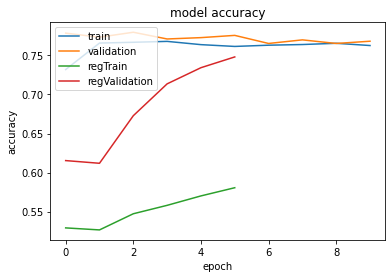

In [182]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_regulizer.history['accuracy'])
plt.plot(history_regulizer.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'regTrain', 'regValidation'], loc='upper left')
plt.show()

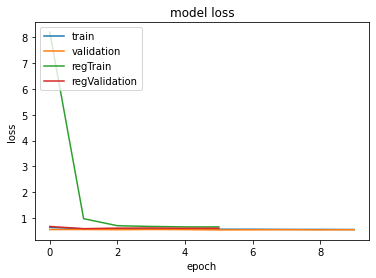

In [183]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_regulizer.history['loss'])
plt.plot(history_regulizer.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'regTrain', 'regValidation'], loc='upper left')
plt.show()

In [201]:
test_dataframe.tail()

,PassengerId,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,Spa_Bucket_Fairly Expensive,Spa_Bucket_Free,VRDeck_Bucket_Cheap,VRDeck_Bucket_Expensive,VRDeck_Bucket_Extremely Cheap,VRDeck_Bucket_Extremely Expensive,VRDeck_Bucket_Fair,VRDeck_Bucket_Fairly Cheap,VRDeck_Bucket_Fairly Expensive,VRDeck_Bucket_Free
4272,9266_02,1,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,1
4273,9269_01,0,0,0.0,847.0,17.0,10.0,144.0,1,0,...,0,0,0,0,1,0,0,0,0,0
4274,9271_01,1,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,1
4275,9273_01,0,0,0.0,2680.0,0.0,0.0,523.0,0,1,...,0,1,0,0,1,0,0,0,0,0
4276,9277_01,1,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
train_dataframe.columns

In [256]:
columns_missing_on_train_df = np.setdiff1d(test_dataframe.columns.to_numpy(),train_dataframe.columns.to_numpy())

In [257]:
columns_missing_on_test_df = np.setdiff1d(train_dataframe.columns.to_numpy(),test_dataframe.columns.to_numpy())

In [258]:
t = test_dataframe.copy()

In [262]:
def add_missing_columns_to_df(missing_columns, df):
  df_length = len(df)
  for c in missing_columns:
    if c != "PassengerId" and c!= 'Transported':
      df[c] = [0.0] * df_length

  return df

In [263]:
test_dataframe = add_missing_columns_to_df(columns_missing_on_test_df, t)

In [265]:
train_dataframe.shape

(8693, 60)

In [266]:
test_copy = test_dataframe.copy()
test_copy = test_copy.drop(columns=['PassengerId'])
x_test = test_copy.to_numpy()

In [267]:
test_copy.tail()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,VRDeck_Bucket_Cheap,VRDeck_Bucket_Expensive,VRDeck_Bucket_Extremely Cheap,VRDeck_Bucket_Extremely Expensive,VRDeck_Bucket_Fair,VRDeck_Bucket_Fairly Cheap,VRDeck_Bucket_Fairly Expensive,VRDeck_Bucket_Free,RoomService_Bucket_Fairly Expensive,ShoppingMall_Bucket_Extremely Expensive
4272,1,0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
4273,0,0,0.0,847.0,17.0,10.0,144.0,1,0,0,...,0,0,1,0,0,0,0,0,0.0,0.0
4274,1,0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0.0,0.0
4275,0,0,0.0,2680.0,0.0,0.0,523.0,0,1,0,...,0,0,1,0,0,0,0,0,0.0,0.0
4276,1,0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0


In [268]:
x_test.shape

(4277, 59)

In [226]:
train_dataframe['ShoppingMall_Bucket_Extremely Expensive']

0       0
1       0
2       0
3       0
4       0
       ..
8688    0
8689    0
8690    0
8691    0
8692    0
Name: ShoppingMall_Bucket_Extremely Expensive, Length: 8693, dtype: uint8

In [275]:
preds = model.predict(x_test)
preds_regulizer = model_regulizer.predict(x_test)

In [276]:
preds = preds.reshape(4277)
for i in range(len(preds)):
    if preds[i]>0.5:
        preds[i] = True
    else:
        preds[i] = False

In [ ]:
preds_regulizer = preds_regulizer.reshape(4277)
for i in range(len(preds_regulizer)):
    if preds_regulizer[i]>0.5:
        preds_regulizer[i] = True
    else:
        preds_regulizer[i] = False

In [277]:
submissionCol1 = raw_test_dataframe.PassengerId

In [278]:
len(submissionCol1)

4277

In [ ]:
submission = pd.DataFrame({'PassengerId': submissionCol1.to_numpy(), 'Transported': preds})
submission.Transported = submission.Transported.astype(bool)
submission.set_index('PassengerId')

In [ ]:
submission_regulizer = pd.DataFrame({'PassengerId': submissionCol1.to_numpy(), 'Transported': preds_regulizer})
submission_regulizer.Transported = submission.Transported.astype(bool)
submission_regulizer.set_index('PassengerId')

In [282]:
submission.to_csv('submission.csv', index=False)
submission_regulizer.to_csv('submission_regulizer.csv', index=False)
print("Submitted!")

Submitted!
